# Importeer de benodigde libraries

Importeer pywraplp uit de library ortools.linear_solver 

Importeer matplotlib.pyplot als plt

In [1]:
from ortools.linear_solver import pywraplp
import matplotlib.pyplot as plt

# Definieer de benodigde variabelen

Wij willen voor het gemak 2 keer dezelfde  dictionairy hebben onder een verschillende naam.
Deze dictionairies noemen wij MAALTIJDEN en MAALTIJDEN2.

Ook maken wij een lijst (UNITS) aan met alleen de 'keys' (namen van de gerechten) van de MAALTIJDEN dictionairy en
een lijst (DATA) met de value's (het aantal calorieën van elke maaltijd).

Vervolgens maken wij 2 lijsten aan met alle dagen van de week (DAGEN) en een lijst met de afgekorte versie
van de dagen (DAGPLT) die wij later gaan gebruiken in onze plot.

Als laatste maken wij een dictionairy (AANBEVELING) aan waar de aanbevelingen in komen te staan voor de week 
en een lijst met recourses waar we een paar essentiële waarden in zetten voor de restricties (1040 is het maximaal aantal calorieën per dag en bijde 1en worden gebruikt om het maximaal aantal diners en lunches limiteren tot 1 per dag).

In [2]:
#Definieer de benodigde variabelen

LUNCHES = {'Pokébowl': 750, 'Kaascrackers': 300, 'Fruitsalade': 250, 
              'Broodje Piri piri': 500, 'Soep met brood': 350, 'Boterham kaas': 290, 'Chicken n Waffles': 596, 'Wrap met kip': 450,
              'Salade met geitenkaas': 570, 'Patatje met': 750, 'Tosti ham en kaas': 200, 'Zakje maltesers': 150, 'Koekjes van oma': 300,}

DINERS = {'Biefstuk met boerenkool': 400, 'Schnitsel met Friet': 535, 'Broodje Shoarma': 500, 
              'Chinese rijsttafel': 600, 'Pannenkoeken': 520, 'Roti met Kouseband': 430, 'Kipburger met koolsalade': 576,
              'KFC bucket': 750, 'Gyrosschotel': 635, 'Nachos met gehakt': 580, 'Droog brood': 150, 'Kipnuggets': 200, 'Kapsalon': 870}

LUNCHES2 = LUNCHES.copy()

DINERS2 = DINERS.copy()

MAALTIJDEN = LUNCHES | DINERS

MAALTIJDEN2 = MAALTIJDEN.copy()

UNITS = list(LUNCHES.keys()) + list(DINERS.keys())

DATA = list(LUNCHES.values()) +  list(DINERS.values())

DAGEN = ['Maandag', 'Dinsdag', 'Woensdag', 'Donderdag', 'Vrijdag', 'Zaterdag', 'Zondag']

DAGPLT = ['Ma', 'Di', 'Wo', 'Do', 'Vr', 'Za', 'Zo']

Kcal = []

AANBEVELING = {}

RESOURCES = [1040, 1, 1]


# Maak het LP model aan

Eerst maken wij een leeg LP model aan en noemen deze solver. Hierin geven wij de naam van ons LP model mee. 
Het tweede onderdeel moet gewoon gekopieerd en geplakt worden.

In stap 1 geven wij aan met welk type variabelen wij in de solver gaan werken. Deze hebben wij op integer 
(Intvar) gezet omdat wij alleen met hele recepten (kunnen) werken. 

In stap 2 worden de restricties toegevoegd aan het model door middel van for loops. De eerste for loop zorgt
ervoor dat alle gekozen recepten niet de maximale caloriegrens van 1040 word overschreden. De tweede for loop
zegt dat er maximaal maar 1 lunchrecept gekozen mag worden en de derde for loop geeft aan dat er maar 1 diner 
gekozen mag worden.

In stap 3 van de solver geven we aan wat onze doelfunctie is en wat ons doel is met de doelfunctie. Ons doel 
is in dit geval om het aandat caloriën zo dicht mogelijk bij de grenswaarde te krijgen van 1035 calorieën, dus 
kiezen wij om de doelfunctie te maximaliseren (Solver.Maximize()).

Vervolgens laten wij het programma zoeken naar de maximale doelfunctie en slaan wij alle gekozen recepten op
in een lijst genaamd keuzelijst. Als de solver geen oplossing kan vinden geeft deze een melding hiervoor en word er niks opgeslagen.

In [3]:
def solve_army(UNITS, DATA, RESOURCES, dag):
  # Create the linear solver using the CBC backend
  solver = pywraplp.Solver('Minimize resource consumption', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

  # 1. Create the variables we want to optimize
  units = [solver.IntVar(0, 1, unit) for unit in UNITS]

  # 2. Add constraints for each resource
  for r in enumerate(RESOURCES):
    solver.Add(sum(DATA[u] * units[u] for u, _ in enumerate(units)) <= RESOURCES[0])
    # solver.Add(sum(DATA[u] * units[u] for u, _ in enumerate(units)) >= RESOURCES[3])
    
  for i in range(len(LUNCHES)):
    solver.Add(sum(units[u] for u in range(len(LUNCHES))) <= RESOURCES[1])
    
  for i in range(len(DINERS)):
    solver.Add(sum(units[u] for u in range(len(LUNCHES), len(MAALTIJDEN))) <= RESOURCES[2])
     
  # 3. Minimize the objective function
  solver.Maximize(sum(DATA[u] * units[u] for u, _ in enumerate(units)))
 
  # Solve problem
  status = solver.Solve()

  # If an optimal solution has been found, print results
  if status == pywraplp.Solver.OPTIMAL:
    for u, _ in enumerate(units):
      if units[u].solution_value() == 1:
          KEUZELIJST.append(units[u].name())
          AANBEVELING[dag] = KEUZELIJST
          MAALTIJDEN.pop(units[u].name())
          # print(KEUZELIJST)
  else:
      print('The solver could not find an optimal solution.')

# Zorg ervoor dat voor alle dagen worden ingedeeld

Zorg ervoor dat de solver 7 keer word aangeroepen om voor elke dag een aanbeveling te kunnen geven.

In [4]:
for i in range(7):
    KEUZELIJST = []
    solve_army(UNITS, DATA, RESOURCES, DAGEN[i])
    UNITS = list(MAALTIJDEN.keys())
    DATA = list(MAALTIJDEN.values())

    

# Uitprinten van de aanbevelingen

Print voor elke dag de aanbeveling uit voor de lunch, het diner en het totaal aantal 
calorieën van de lunch en het diner.

In [5]:
print()
print("AANBEVELINGEN VOOR DE WEEK:")
print()
for i in range(len(DAGEN)):
    Kcal.append(MAALTIJDEN2[AANBEVELING[DAGEN[i]][0]] + MAALTIJDEN2[AANBEVELING[DAGEN[i]][1]])
    print(f"{DAGEN[i]},   LUNCH: {AANBEVELING[DAGEN[i]][0]}")
    print(f"            DINER: {AANBEVELING[DAGEN[i]][1]}")
    print(f"            Kcal:   {MAALTIJDEN2[AANBEVELING[DAGEN[i]][0]] + MAALTIJDEN2[AANBEVELING[DAGEN[i]][1]]}")


AANBEVELINGEN VOOR DE WEEK:

Maandag,   LUNCH: Boterham kaas
            DINER: KFC bucket
            Kcal:   1040
Dinsdag,   LUNCH: Biefstuk met boerenkool
            DINER: Gyrosschotel
            Kcal:   1035
Woensdag,   LUNCH: Schnitsel met Friet
            DINER: Broodje Shoarma
            Kcal:   1035
Donderdag,   LUNCH: Chinese rijsttafel
            DINER: Roti met Kouseband
            Kcal:   1030
Vrijdag,   LUNCH: Wrap met kip
            DINER: Nachos met gehakt
            Kcal:   1030
Zaterdag,   LUNCH: Zakje maltesers
            DINER: Kapsalon
            Kcal:   1020
Zondag,   LUNCH: Pokébowl
            DINER: Kipnuggets
            Kcal:   950


# Maak een plot van het totaal aantal ingedeelde calorieën

Eerst worden font1 en font2 toegekent. Hierin staat de betreffende font die we willen gebruiken ('family'), de kleur van de tekst ('color'), de dikte van de text ('weight') en de groote van het lettertype ('size'). font1 wordt hier gebruikt voor de titel en font2 wordt gebruikt voor de namen van de assen.

Als tweede wort er een barplot gemaakt en hiervan worden de kleur bepaald, en de naam van de assen en de titel.

Als laatste word de plot laten zien van het programma.

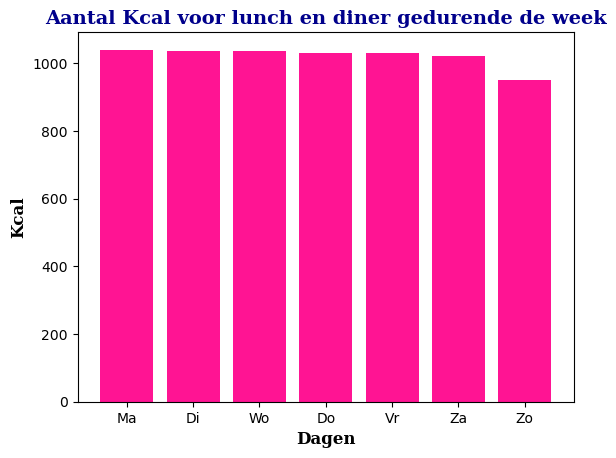

In [6]:
font1 = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 14,
        }

font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

_ = plt.bar(DAGPLT, Kcal, color = 'deeppink', linewidth = 1.5)
_ = plt.xlabel('Dagen', fontdict = font2)
_ = plt.ylabel('Kcal', fontdict = font2)
_ = plt.title('Aantal Kcal voor lunch en diner gedurende de week', fontdict = font1)

Figuur = plt.gcf()
plt.show()
Figuur.savefig('Kcal_verloop_per_week_V2.jpeg', dpi = 100)